# ADVANCED REGRESSION ASSIGNMENT


### PROBLEM STATEMENT :  A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market . We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### IMPORTING LIBRARIES

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [220]:
house_price=pd.read_csv("/Users/mnarasap/Downloads/train.csv")
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [221]:
#Ispection of dataframe

house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [222]:
house_price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [223]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [224]:
house_price.dtypes.head(50)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

In [225]:
house_price.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [226]:
house_price.shape

(1460, 81)

###  DATA CLEANING AND DATA VISUALIZATION

In [227]:
# checking if any column has duplicate value
house_price.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [228]:
# checking null values
house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [229]:
# Checking the null value percentage
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)


PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [230]:
house_price['SalePrice'].astype('category').value_counts()

140000    20
135000    17
145000    14
155000    14
110000    13
          ..
221500     1
223000     1
224500     1
226700     1
34900      1
Name: SalePrice, Length: 663, dtype: int64

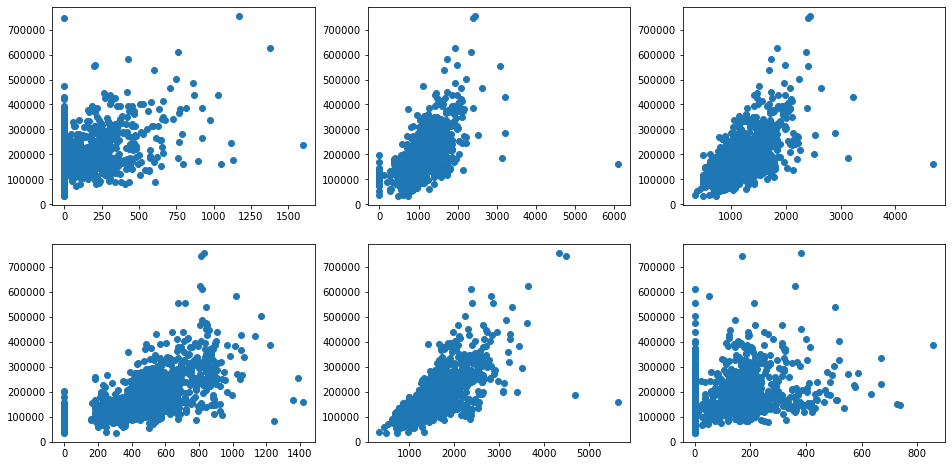

In [231]:
# plotting scatter plot between variables
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

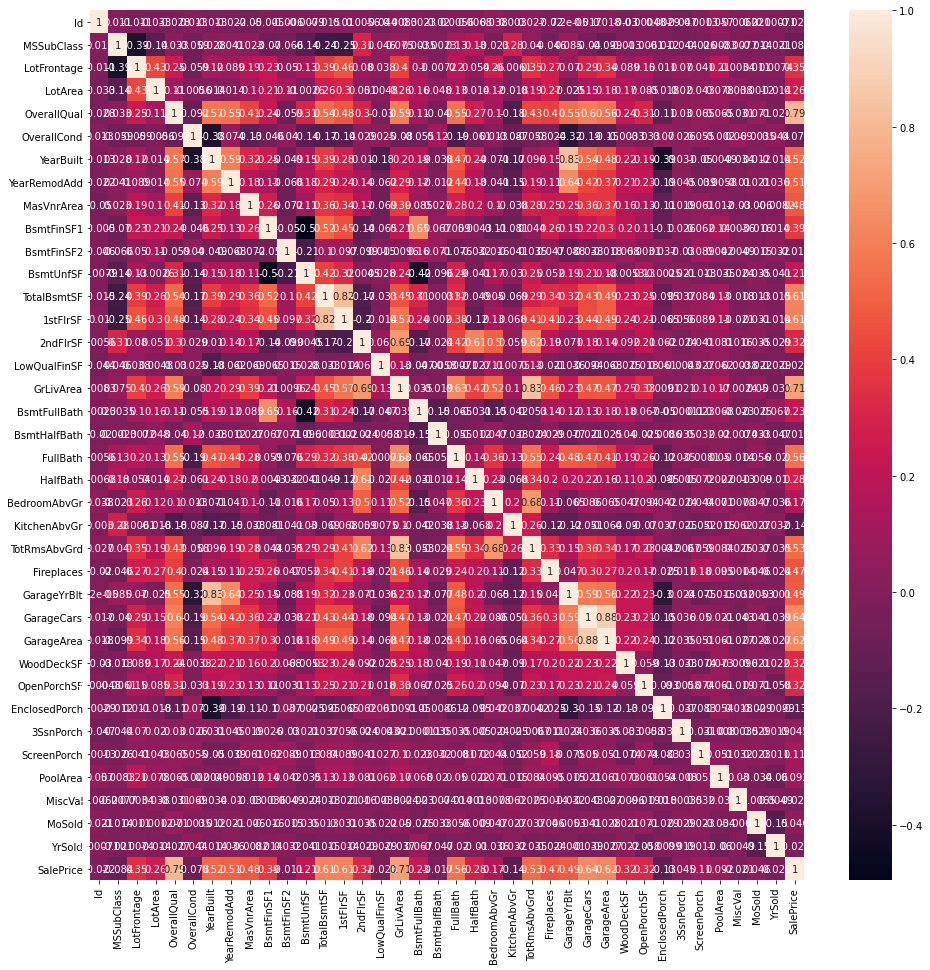

In [232]:
# Checking correlation using heatmap
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

<Figure size 2160x1800 with 0 Axes>

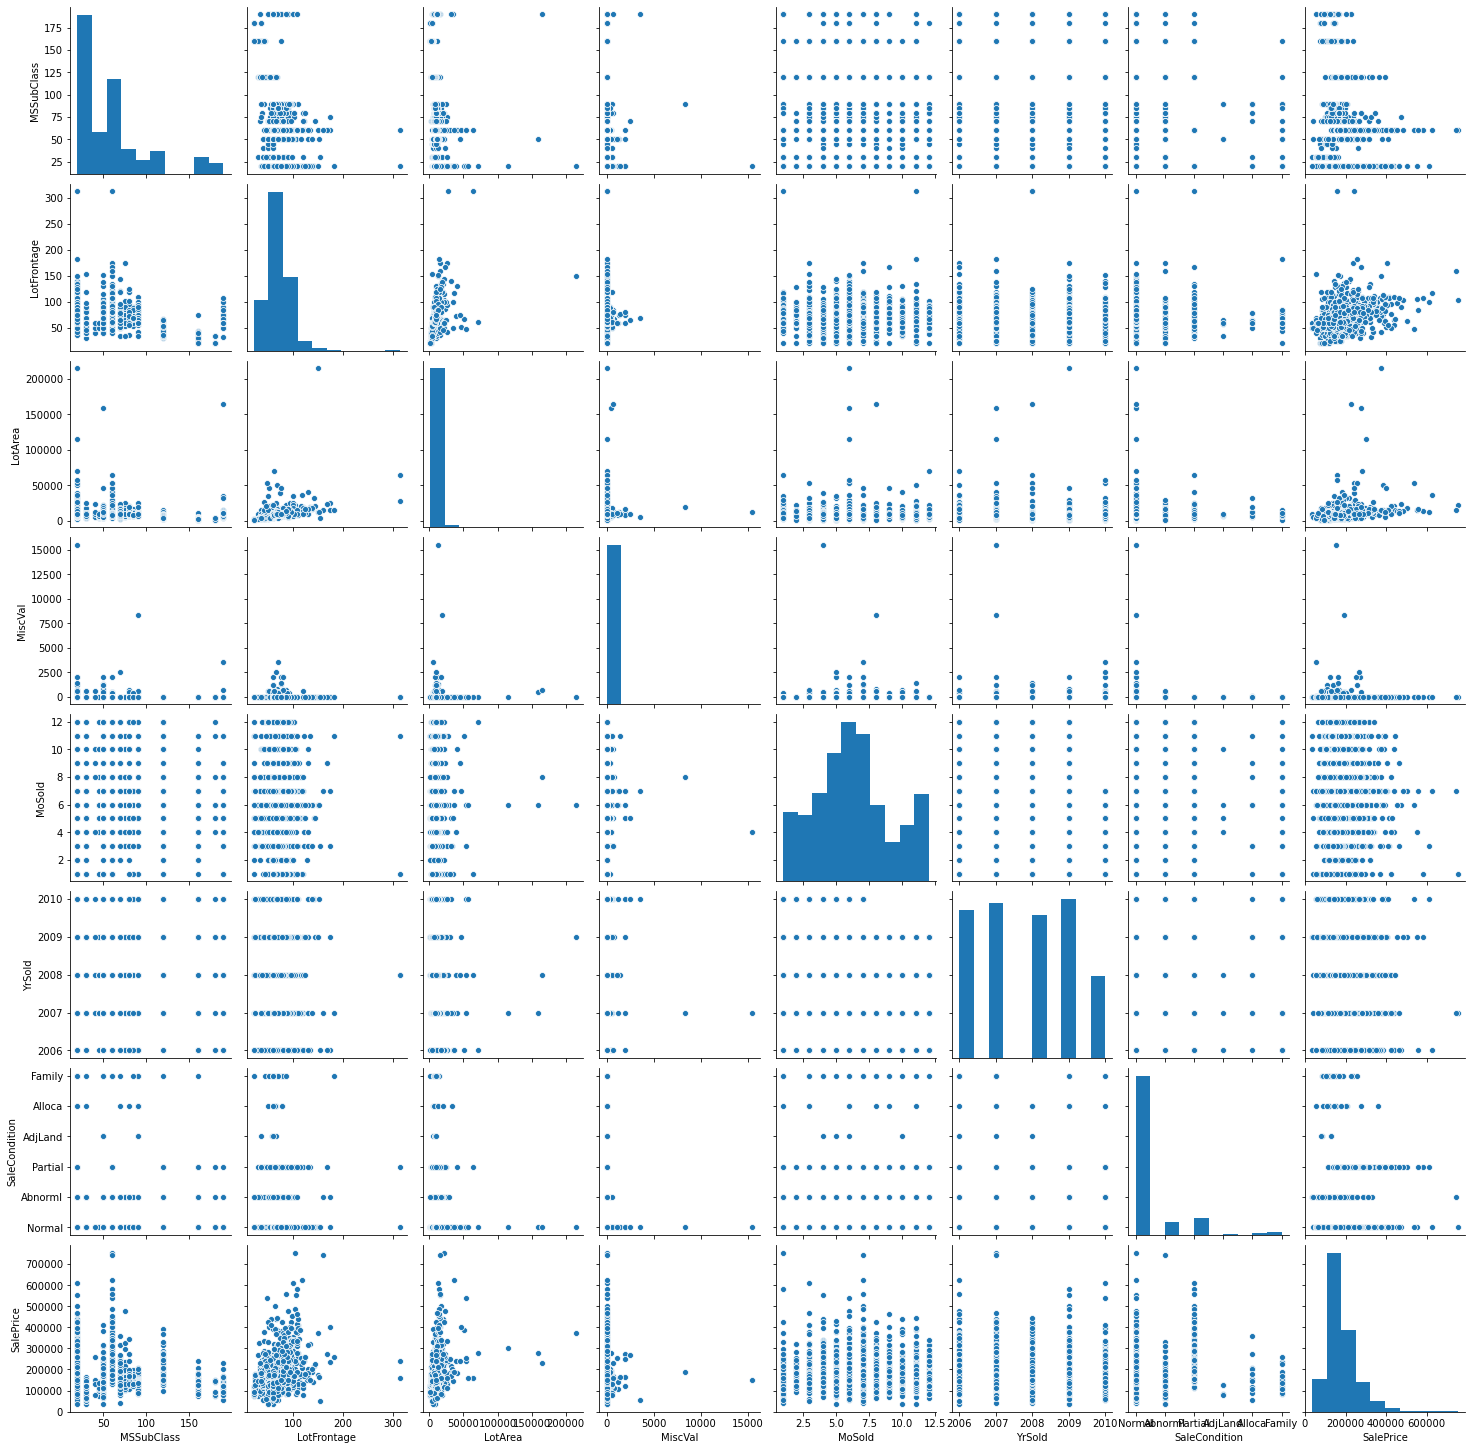

In [233]:
#Paiplot on some of the variables (for both numerical and categorical variables)
plt.figure(figsize=(30,25))
sns.pairplot(house_price,x_vars=['MSSubClass','LotFrontage','LotArea','MiscVal','MoSold','YrSold','SaleCondition','SalePrice'],y_vars=['MSSubClass','LotFrontage','LotArea','MiscVal','MoSold','YrSold','SaleCondition','SalePrice'])
plt.show()

In [234]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [235]:
# Percentage of missing values of all the columns
def get_percentage_missing(house_price):
    """ Calculates percentage of NaN values in DataFrame
    :param application: Pandas DataFrame object
    :return: float
    """
    num = house_price.isnull().sum()
    den = len(house_price)
    return round(num/den, 2)

In [236]:
get_percentage_missing(house_price)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.18
LotArea          0.00
                 ... 
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
Length: 81, dtype: float64

In [237]:
house_price.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [238]:
#Removing columns which have null percentage more than 45%

house_price = house_price.drop(house_price.columns[house_price.apply(lambda col: col.isnull().sum()/len(house_price) > 0.45)], axis=1)

In [239]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

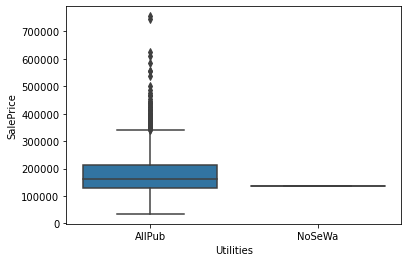

In [240]:
#Analysing few features with sales price

sns.boxplot(x='Utilities',y='SalePrice',data=house_price)


In [241]:
house_price.Utilities.value_counts()
#As we can see except one row all the values are Allpub, so this column is of no use for analysing, need to drop this

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [242]:
# dropping Utilities column
house_price=house_price.drop(columns=['Utilities'],axis=1)
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

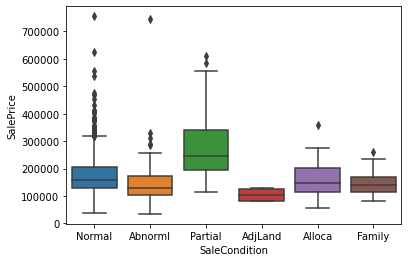

In [243]:
# Checking on Salecondition, we can see the outliers for almost all the categories
# For Normal the outliers are falling above 3.5 lakhs
# but most of the houses' salecondition is partial whose saleprice is more compared to other categories
sns.boxplot(x='SaleCondition',y='SalePrice',data=house_price)

In [244]:
house_price.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [245]:
house_price.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

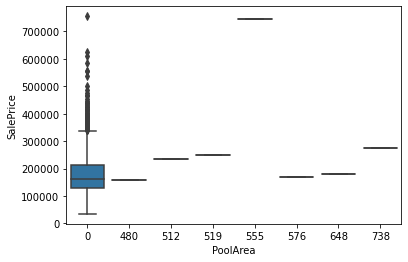

In [246]:
# most of the values for poolarea are 0, which have the sales price at approx 2 Lakhs
sns.boxplot(x='PoolArea',y='SalePrice',data=house_price)

In [247]:
house_price.ScreenPorch.value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

In [248]:
house_price['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

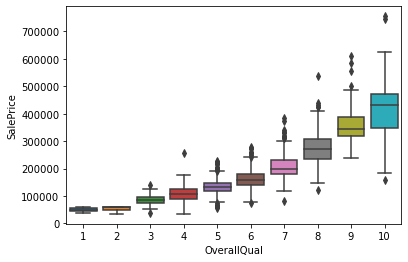

In [249]:
"""* OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
* GrLivArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* TotalBsmtSF: Total square feet of the basement area
* 1stFlrSF: First Floor square feet
* FullBath: Full bathrooms above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* YearBuilt: Original construction date """

# plotting graph to analyze overallqual vs salesprice

sns.boxplot(x='OverallQual',y='SalePrice',data=house_price)

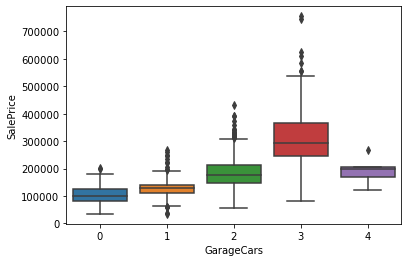

In [250]:
# Analysing Garagaecars vs sale price, 
# From the above plot we can say that for GarageCars of 3, the SalePrice is more.
# But strange is that the GarageCars==4 having less cost, As it is an outlier we can remove this outlier
sns.boxplot(x='GarageCars',y='SalePrice',data=house_price)

Text(0, 0.5, 'SalePrice')

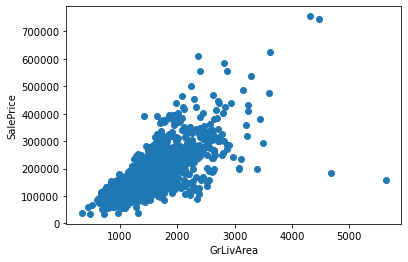

In [251]:
# Analysing GrLivArea vs SalePrice
# GrLivArea seems outside the range of 4000 to 200000 appears to be an outlier. We can remove this outlier.
plt.scatter(house_price.GrLivArea,house_price.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

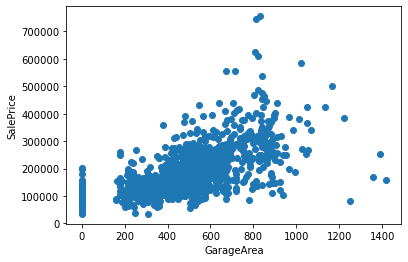

In [252]:
# From the below plot, we can say that for GarageArea of 200–1000 has most of the SalePrice.
# But strange is that the GarageArea>=1000 having less cost, As it is an outlier we can remove this outlier
plt.scatter(house_price.GarageArea,house_price.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

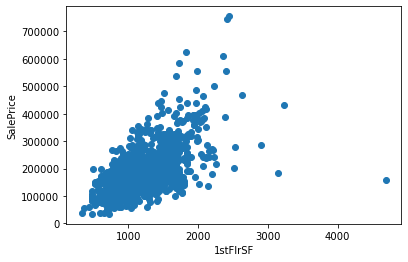

In [253]:
#we can infer from below that for 1stFirSF of 500–2000 has most of the SalePrice and as 1st-floor square feet increases the SalePrice also increases
plt.scatter(house_price['1stFlrSF'],house_price['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

In [254]:
house_price['1stFlrSF'].value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

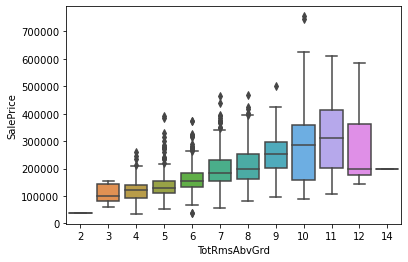

In [255]:
# TotRmsAbvGrd vs saleprice
# From the below plot, we can say that for TotRmsAbvGrd having more than 11 rows has less weight.
# May be those are old enough due to which they cost less, But it is just an assumption.
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=house_price)

Text(0, 0.5, 'SalePrice')

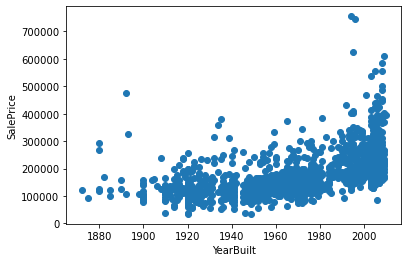

In [256]:
# checking the year built with sale price, how has changed over the years
# Our assumption was if the building cost is less for a big house, it might be because it was old. But now even if the building is old, The cost seems to be high
# So the reason may be because of stock market crashes.

plt.scatter(house_price['YearBuilt'],house_price['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

In [257]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

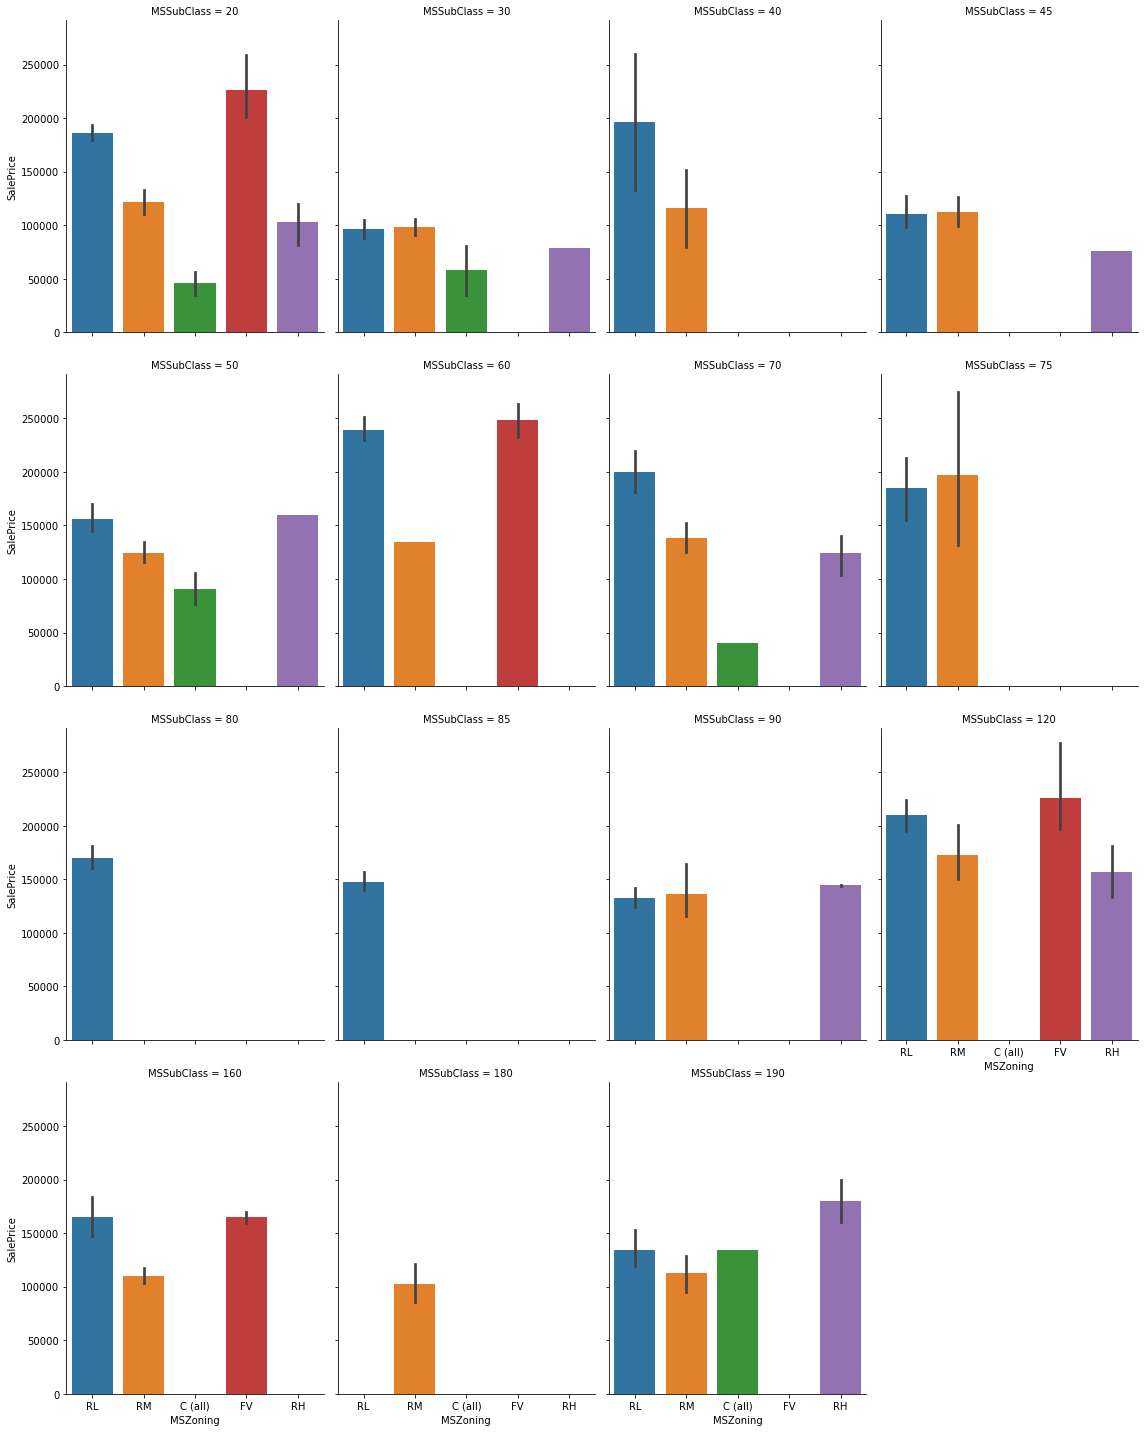

In [258]:
#plotting graphs for Mszoning with MSsubclass vs target variable SalePrice

sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=house_price, kind='bar', col_wrap=4, aspect=0.8)


In [259]:
# Checking some columns and the values they hold

house_price.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [260]:
house_price.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [261]:
# dropping Street column, as it is also containing Pave as the most of the values, so very less analysing can happen, which is of no use

house_price.Street.value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [262]:
house_price=house_price.drop(['Street'],axis=1)
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 74 columns]

In [263]:
house_price.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [264]:
house_price.EnclosedPorch.value_counts()

0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

In [265]:
house_price.ScreenPorch.value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

In [266]:
# from below we can infer that most of the houses does not have pool area , only few have alloted space like listed below
house_price.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [267]:
house_price.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [268]:
house_price.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [269]:
house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

### DATA PREPARATION

In [273]:
# converting Year built to an Age column and dropping unnecessary columns

house_price['Age'] = pd.datetime.now().year - house_price['YearBuilt']
house_price['Age']

0        17
1        44
2        19
3       105
4        20
       ... 
1455     21
1456     42
1457     79
1458     70
1459     55
Name: Age, Length: 1460, dtype: int64

In [274]:

house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl      CollgCr  ...         0           0        0   
1       FR2       Gtl      Veenker  ...         0           0        0   
2    Inside       Gtl      CollgCr  ...         0           0        0   
3    Corner       Gtl      Crawfor  ...         0           0        0   
4       FR2       Gtl      NoRidge  ...         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  Age  
0       0       2    2008        WD         Normal    208500   17  
1       0       5    2007        WD         Normal    181500   44  
2       0       9    2008        WD         Normal    223500   19  
3       0       2    2006        WD        Abnorml    140000  105  
4       0      12    2008        WD         Normal    250000   20  

[5 rows x 75 columns]

In [275]:
# since other Year contained columns are not useful for analysis, dropping those, we only need to consider Age
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')


Text(0, 0.5, 'SalePrice')

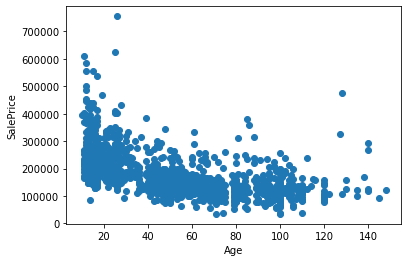

In [361]:
# checking Age vs SalesPrice
# If the age of the house is less the sales is more, this can be inferred here
plt.scatter(house_price['Age'],house_price['SalePrice'])
plt.xlabel('Age')
plt.ylabel('SalePrice')

In [276]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold SaleType SaleCondition SalePrice  Age  
0        0        0       2       WD        Normal    208500   17  
1        0        0       5       WD        Normal    181500   44  
2        0        0       9       WD        Normal    223500   19  
3        0        0       2       WD       Abnorml    140000  105  
4        0        0      12       WD        Normal    250000   20  

[5 rows x 71 columns]

In [277]:
# Id column is not useful for our analysis so dropping this as well
house_price = house_price.drop('Id',axis='columns')


In [278]:
house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       Gtl      CollgCr       Norm  ...             0         0           0   
1       Gtl      Veenker      Feedr  ...             0         0           0   
2       Gtl      CollgCr       Norm  ...             0         0           0   
3       Gtl      Crawfor       Norm  ...           272         0           0   
4       Gtl      NoRidge       Norm  ...             0         0           0   

   PoolArea  MiscVal MoSold SaleType SaleCondition SalePrice  Age  
0         0        0      2       WD        Normal    208500   17  
1         0        0      5       WD        Normal    181500   44  
2         0        0      9       WD        Normal    223500   19  
3         0        0      2       WD       Abnorml    140000  105  
4         0        0     12       WD        Normal    250000   20  

[5 rows x 70 columns]

In [279]:
# checking each column by describing, to have a check on outliers
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold      SalePrice          Age  
count  1460.000000   1460.000000  1460.000000    1460.000000  1460.000000  
mean      2.758904     43.489041     6.321918  180921.195890    48.732192  
std      40.177307    496.123024     2.703626   79442.502883    30.202904  
min       0.000000      0.000000     1.000000   34900.000000    10.000000  
25%       0.000000      0.000000     5.000000  129975.000000    20.000000  
50%       0.000000      0.000000     6.000000  163000.000000    47.000000  
75%       0.000000      0.000000     8.000000  214000.000000    66.000000  
max     738.000000  15500.000000    12.000000  755000.000000   148.000000  

[8 rows x 34 columns]

In [280]:
# checking shape before outlier treatment
house_price.shape


(1460, 70)

In [281]:
# Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively


num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [282]:
# checking shape after removing outliers from dataset
house_price.shape

(1433, 70)

In [283]:
house_price.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      250
LotArea            0
LotShape           0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 70, dtype: int64

In [284]:
# Previously in data cleaning missed to drop LotFrontage , as this also has max null values and with EDA realised it is not a much useful feature, so removing it 
house_price = house_price.drop(['LotFrontage'],axis=1)

In [285]:
house_price.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... EnclosedPorch 3SsnPorch  \
0      CollgCr       Norm       Norm  ...             0         0   
1      Veenker      Feedr       Norm  ...             0         0   
2      CollgCr       Norm       Norm  ...             0         0   
3      Crawfor       Norm       Norm  ...           272         0   
4      NoRidge       Norm       Norm  ...             0         0   

   ScreenPorch  PoolArea MiscVal MoSold SaleType SaleCondition SalePrice  Age  
0            0         0       0      2       WD        Normal    208500   17  
1            0         0       0      5       WD        Normal    181500   44  
2            0         0       0      9       WD        Normal    223500   19  
3            0         0       0      2       WD       Abnorml    140000  105  
4            0         0       0     12       WD        Normal    250000   20  

[5 rows x 69 columns]

In [286]:
# rechecking null percentage columns
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/len(house_price.index),2).values>0.00]

BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [287]:
# Month sold feature is also not useful column, as we already have the Age column for our further analysis
house_price = house_price.drop(['MoSold'],axis=1)


In [288]:
house_price.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... OpenPorchSF EnclosedPorch  \
0      CollgCr       Norm       Norm  ...          61             0   
1      Veenker      Feedr       Norm  ...           0             0   
2      CollgCr       Norm       Norm  ...          42             0   
3      Crawfor       Norm       Norm  ...          35           272   
4      NoRidge       Norm       Norm  ...          84             0   

   3SsnPorch  ScreenPorch PoolArea MiscVal SaleType SaleCondition SalePrice  \
0          0            0        0       0       WD        Normal    208500   
1          0            0        0       0       WD        Normal    181500   
2          0            0        0       0       WD        Normal    223500   
3          0            0        0       0       WD       Abnorml    140000   
4          0            0        0       0       WD        Normal    250000   

   Age  
0   17  
1   44  
2   19  
3  105  
4   20  

[5 rows x 68 columns]

In [289]:
# checking columns containg Nan values and need to check what best can be imputed there

house_price.isna()

MSSubClass  MSZoning  LotArea  LotShape  LandContour  LotConfig  \
0          False     False    False     False        False      False   
1          False     False    False     False        False      False   
2          False     False    False     False        False      False   
3          False     False    False     False        False      False   
4          False     False    False     False        False      False   
...          ...       ...      ...       ...          ...        ...   
1454       False     False    False     False        False      False   
1455       False     False    False     False        False      False   
1456       False     False    False     False        False      False   
1458       False     False    False     False        False      False   
1459       False     False    False     False        False      False   

      LandSlope  Neighborhood  Condition1  Condition2  ...  OpenPorchSF  \
0         False         False       False       False  ...        False   
1         False         False       False       False  ...        False   
2         False         False       False       False  ...        False   
3         False         False       False       False  ...        False   
4         False         False       False       False  ...        False   
...         ...           ...         ...         ...  ...          ...   
1454      False         False       False       False  ...        False   
1455      False         False       False       False  ...        False   
1456      False         False       False       False  ...        False   
1458      False         False       False       False  ...        False   
1459      False         False       False       False  ...        False   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SaleType  \
0             False      False        False     False    False     False   
1             False      False        False     False    False     False   
2             False      False        False     False    False     False   
3             False      False        False     False    False     False   
4             False      False        False     False    False     False   
...             ...        ...          ...       ...      ...       ...   
1454          False      False        False     False    False     False   
1455          False      False        False     False    False     False   
1456          False      False        False     False    False     False   
1458          False      False        False     False    False     False   
1459          False      False        False     False    False     False   

      SaleCondition  SalePrice    Age  
0             False      False  False  
1             False      False  False  
2             False      False  False  
3             False      False  False  
4             False      False  False  
...             ...        ...    ...  
1454          False      False  False  
1455          False      False  False  
1456          False      False  False  
1458          False      False  False  
1459          False      False  False  

[1433 rows x 68 columns]

In [347]:
#dropping these columns, which are of not use for our analysis
drop_col=['LandSlope','LandContour','Condition1','Condition2','BldgType','RoofMatl','Heating','Electrical',
         'Functional','PavedDrive','SaleType','SaleCondition']
house_price.drop(drop_col,axis=1,inplace=True)

In [290]:
house_price.BsmtQual.value_counts()

TA    640
Gd    604
Ex    118
Fa     35
Name: BsmtQual, dtype: int64

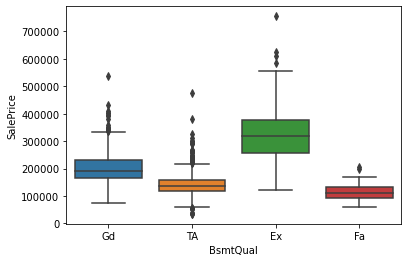

In [291]:
# some EDA on Basamenet related features : BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2

# For BsmtQual, for Excellent basement category the Sales price is of 3.2 lakhs approx, the Sales price for property with Fair basement is lowest.
sns.boxplot(x='BsmtQual',y='SalePrice',data=house_price)

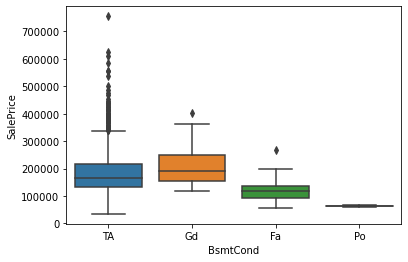

In [292]:
# checking basement condition and sales price
sns.boxplot(x='BsmtCond',y='SalePrice',data=house_price)

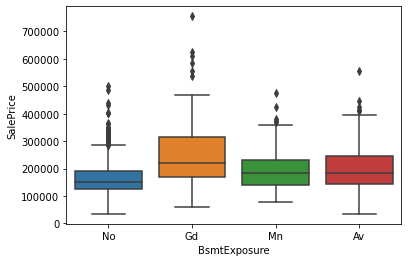

In [293]:
# checking the BsmtExposure , for good the sales price is more and selling is good
sns.boxplot(x='BsmtExposure',y='SalePrice',data=house_price)

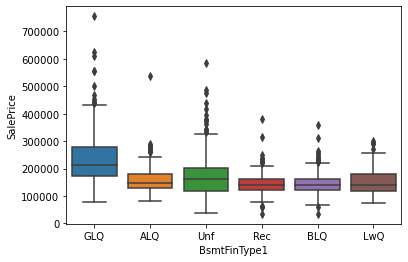

In [294]:
# checking BsmtFinType1- Rating of basement finished area, for GLQ(good living quarters) the sales is highest, maximum is above 7 lakhs 
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=house_price)

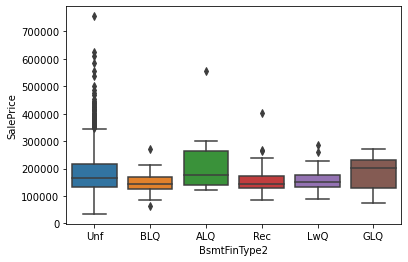

In [295]:
# checking BsmtFinType2: Rating of basement finished area (if multiple types)
# For Average Living Quarters properties the sale is more, but most of the sales went for unfinished ones

sns.boxplot(x='BsmtFinType2',y='SalePrice',data=house_price)

In [296]:
house_price.BsmtFinSF1.value_counts()

0      461
24      12
16       9
662      5
936      5
      ... 
810      1
819      1
824      1
827      1
631      1
Name: BsmtFinSF1, Length: 626, dtype: int64

In [297]:
house_price.BsmtFinSF2.value_counts()

0       1273
180        4
374        3
539        2
391        2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 140, dtype: int64

In [298]:
house_price.TotalBsmtSF.value_counts()

0       36
864     35
672     16
912     15
1040    13
        ..
1003     1
1620     1
1005     1
1006     1
2046     1
Name: TotalBsmtSF, Length: 709, dtype: int64

Text(0, 0.5, 'SalePrice')

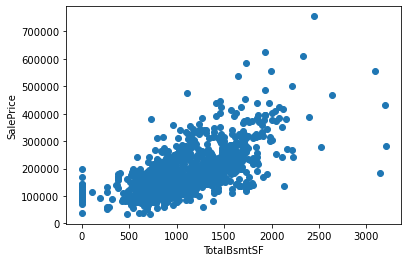

In [299]:
# checking with scatter plot the Total basement sq ft and the sales price

#most of the sales are between 2 to 4 Lakhs for Basement area between 500-1500 sqft
plt.scatter(house_price['TotalBsmtSF'],house_price['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [300]:
# analysing Heating with sales price
house_price.Heating.value_counts()

GasA     1402
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [301]:
house_price.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
                ..
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 68, dtype: int64

In [302]:
# most of the houses property have central air conditioning for which the sales price is more 
house_price.CentralAir.value_counts()

Y    1339
N      94
Name: CentralAir, dtype: int64

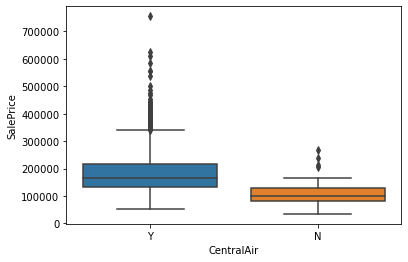

In [303]:
sns.boxplot(x='CentralAir',y='SalePrice',data=house_price)

In [304]:
# checking Electrical

house_price.Electrical.value_counts()

SBrkr    1307
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

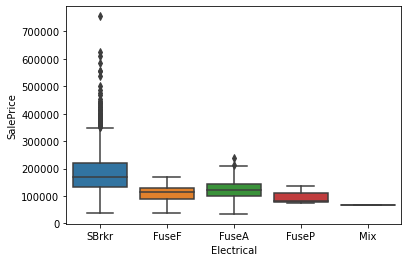

In [305]:
# most of the houses have Standard Circuit Breakers & Romex
# for mix it is a single record, we can combine the categories here, like Fuse P , Fuse F
sns.boxplot(x='Electrical',y='SalePrice',data=house_price)

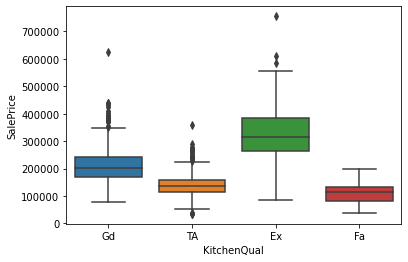

In [306]:
# checking Kitchen Quality
# excellent ones have more sales price
sns.boxplot(x='KitchenQual',y='SalePrice',data=house_price)

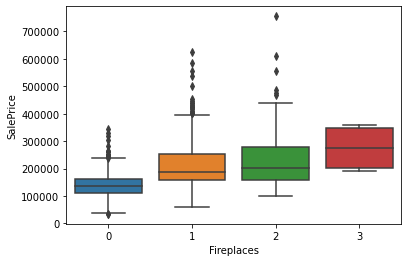

In [307]:
# checking Fireplaces
# number of fireplaces as 3 has maximum sales price
sns.boxplot(x='Fireplaces',y='SalePrice',data=house_price)

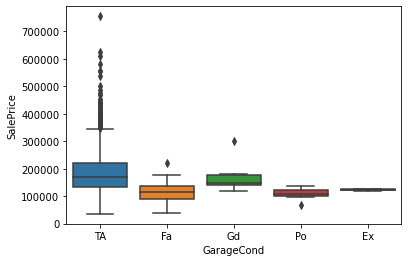

In [308]:
# for Garage Condition, Typical have more sale price

sns.boxplot(x='GarageCond',y='SalePrice',data=house_price)

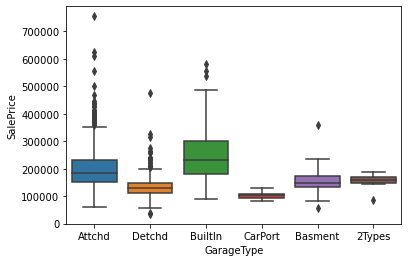

In [309]:
# checking GarageType, Built-In (Garage part of house - typically has room above garage) have more sales price
sns.boxplot(x='GarageType',y='SalePrice',data=house_price)

In [310]:
# Below are having some kind of order and hence we can say these are ordinal in nature
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

LandSlope ExterQual BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       Gtl        Gd       Gd       TA           No          GLQ   
1       Gtl        TA       Gd       TA           Gd          ALQ   
2       Gtl        Gd       Gd       TA           Mn          GLQ   
3       Gtl        TA       TA       Gd           No          ALQ   
4       Gtl        Gd       Gd       TA           Av          GLQ   

  BsmtFinType2 HeatingQC CentralAir KitchenQual GarageFinish GarageQual  \
0          Unf        Ex          Y          Gd          RFn         TA   
1          Unf        Ex          Y          TA          RFn         TA   
2          Unf        Ex          Y          Gd          RFn         TA   
3          Unf        Gd          Y          Gd          Unf         TA   
4          Unf        Ex          Y          Gd          RFn         TA   

  GarageCond ExterCond LotShape  
0         TA        TA      Reg  
1         TA        TA      Reg  
2         TA        TA      IR1  
3         TA        TA      IR1  
4         TA        TA      IR1

In [311]:
#Below columns contain NaN values
#BsmtQual           36
#BsmtCond           36
#BsmtExposure       37
#BsmtFinType1       36
#BsmtFinType2       37
#GarageType         80
#GarageQual         80
#GarageCond         80
#GarageFinish       1244

house_price.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
                ..
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 68, dtype: int64

In [312]:
#'GarageType','GarageFinish','GarageQual','GarageCond' are nan because there is No Garage'.So replacing NANs with it.

for col in ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']:
    house_price[col].fillna('NG', inplace=True)



In [345]:

house_price.GarageType.value_counts()

Attchd     849
Detchd     385
BuiltIn     86
NG          80
Basment     19
CarPort      8
2Types       6
Name: GarageType, dtype: int64

In [348]:
# Imputing garagetype skewed categories to one category
house_price['GarageType']= house_price['GarageType'].replace('Basment','Other_gt')
house_price['GarageType']= house_price['GarageType'].replace('CarPort','Other_gt')
house_price['GarageType']= house_price['GarageType'].replace('2Types','Other_gt')

In [349]:
house_price.GarageType.value_counts()

Attchd      849
Detchd      385
BuiltIn      86
NG           80
Other_gt     33
Name: GarageType, dtype: int64

In [350]:
# imputing Nan values in basement columns as NB so that we can differenciate as no basement
for col in ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    house_price[col].fillna('NB', inplace=True)

In [351]:
# no more NaN values
house_price.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [357]:
# label encoding these ordinal features
# Need to label Notavailable as w.r.t its column specification

house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NB':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NB':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NB':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NB':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NB':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NG':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NG':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NG':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [358]:
# lets checkback after encoding

house_price[['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0          3         4         3             1             6             1   
1          2         4         3             4             5             1   
2          3         4         3             2             6             1   
3          2         3         4             1             5             1   
4          3         4         3             3             6             1   

   HeatingQC  CentralAir  KitchenQual  GarageFinish  GarageQual  GarageCond  \
0          4           1            3             2           3           3   
1          4           1            2             2           3           3   
2          4           1            3             2           3           3   
3          3           1            3             1           3           3   
4          4           1            3             2           3           3   

   ExterCond  LotShape  
0          2         3  
1          2         3  
2          2         0  
3          2         0  
4          2         0

In [359]:
house_price.head()

MSSubClass MSZoning  LotArea  LotShape LotConfig Neighborhood HouseStyle  \
0          60       RL     8450         3    Inside      CollgCr     2Story   
1          20       RL     9600         3       FR2  other_nghbr     1Story   
2          60       RL    11250         0    Inside      CollgCr     2Story   
3          70       RL     9550         0    Corner  other_nghbr     2Story   
4          60       RL    14260         0       FR2  other_nghbr     2Story   

   OverallQual  OverallCond RoofStyle  ... GarageCond WoodDeckSF OpenPorchSF  \
0            7            5     Gable  ...          3          0          61   
1            6            8     Gable  ...          3        298           0   
2            7            5     Gable  ...          3          0          42   
3            7            5     Gable  ...          3          0          35   
4            8            5     Gable  ...          3        192          84   

   EnclosedPorch  3SsnPorch  ScreenPorch PoolArea  MiscVal  SalePrice  Age  
0              0          0            0        0        0     208500   17  
1              0          0            0        0        0     181500   44  
2              0          0            0        0        0     223500   19  
3            272          0            0        0        0     140000  105  
4              0          0            0        0        0     250000   20  

[5 rows x 56 columns]

In [316]:
# Checking the large percentage of skewed categories in columns and combining it to one single category

house_price.Neighborhood.value_counts(normalize=True)

NAmes      0.154222
CollgCr    0.103280
OldTown    0.078856
Edwards    0.068388
Somerst    0.057920
Gilbert    0.053733
NridgHt    0.053036
Sawyer     0.050942
NWAmes     0.049546
BrkSide    0.040475
SawyerW    0.040475
Crawfor    0.034194
Mitchel    0.033496
NoRidge    0.027913
Timber     0.025122
IDOTRR     0.025122
ClearCr    0.018144
SWISU      0.017446
StoneBr    0.017446
Blmngtn    0.011863
MeadowV    0.011863
BrDale     0.011165
Veenker    0.007676
NPkVill    0.006281
Blueste    0.001396
Name: Neighborhood, dtype: float64

In [317]:
house_price.Exterior1st.value_counts(normalize=True)

VinylSd    0.354501
HdBoard    0.153524
MetalSd    0.152128
Wd Sdng    0.140963
Plywood    0.071179
CemntBd    0.040475
BrkFace    0.034194
WdShing    0.018144
Stucco     0.016050
AsbShng    0.013957
Stone      0.001396
BrkComm    0.001396
ImStucc    0.000698
AsphShn    0.000698
CBlock     0.000698
Name: Exterior1st, dtype: float64

In [318]:
house_price.HouseStyle.value_counts()

1Story    714
2Story    436
1.5Fin    150
SLvl       63
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [319]:
# performing combining of skewed categories to one category as Other
# performing for HouseStyle
house_price['HouseStyle']= house_price['HouseStyle'].replace('1.5Unf','Other_house_style')

In [320]:
house_price['HouseStyle']= house_price['HouseStyle'].replace('2.5Unf','Other_house_style')
house_price['HouseStyle']= house_price['HouseStyle'].replace('2.5Fin','Other_house_style')

In [321]:
house_price.HouseStyle.value_counts()

1Story               714
2Story               436
1.5Fin               150
SLvl                  63
SFoyer                37
Other_house_style     33
Name: HouseStyle, dtype: int64

In [322]:
# performing for Roofstyle
house_price.RoofStyle.value_counts()


Gable      1124
Hip         278
Flat         12
Gambrel      11
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64

In [323]:
house_price['RoofStyle']= house_price['RoofStyle'].replace('Gambrel','Other_rf_stl')
house_price['RoofStyle']= house_price['RoofStyle'].replace('Mansard','Other_rf_stl')
house_price['RoofStyle']= house_price['RoofStyle'].replace('Shed','Other_rf_stl')
house_price['RoofStyle']= house_price['RoofStyle'].replace('Flat','Other_rf_stl')

In [324]:
house_price.RoofStyle.value_counts()

Gable           1124
Hip              278
Other_rf_stl      31
Name: RoofStyle, dtype: int64

In [325]:
# performing for foundation
house_price.Foundation.value_counts()

PConc     634
CBlock    622
BrkTil    146
Slab       23
Stone       5
Wood        3
Name: Foundation, dtype: int64

In [326]:
house_price['Foundation']= house_price['Foundation'].replace('Slab','slab_stone_wood')
house_price['Foundation']= house_price['Foundation'].replace('Stone','slab_stone_wood')
house_price['Foundation']= house_price['Foundation'].replace('Wood','slab_stone_wood')
house_price.Foundation.value_counts()

PConc              634
CBlock             622
BrkTil             146
slab_stone_wood     31
Name: Foundation, dtype: int64

In [327]:
house_price.Exterior2nd.value_counts()

VinylSd    498
MetalSd    212
HdBoard    204
Wd Sdng    196
Plywood    136
CmentBd     57
Wd Shng     37
BrkFace     24
Stucco      24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [328]:
house_price.Exterior1st.value_counts()

VinylSd    508
HdBoard    220
MetalSd    218
Wd Sdng    202
Plywood    102
CemntBd     58
BrkFace     49
WdShing     26
Stucco      23
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [329]:
# creating one category for skewed columns in Neighbourhood, Exterior1st, Exterior2nd
house_price['Exterior1st']= house_price['Exterior1st'].replace('AsbShng','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('Stone','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('BrkComm','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('ImStucc','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('AsphShn','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('CBlock','other_ext1')
house_price.Exterior1st.value_counts()

VinylSd       508
HdBoard       220
MetalSd       218
Wd Sdng       202
Plywood       102
CemntBd        58
BrkFace        49
other_ext1     27
WdShing        26
Stucco         23
Name: Exterior1st, dtype: int64

In [330]:
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('AsbShng','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('ImStucc','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Brk Cmn','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Stone','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('AsphShn','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Other','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('CBlock','other_ext2')
house_price.Exterior2nd.value_counts()

VinylSd       498
MetalSd       212
HdBoard       204
Wd Sdng       196
Plywood       136
CmentBd        57
other_ext2     45
Wd Shng        37
BrkFace        24
Stucco         24
Name: Exterior2nd, dtype: int64

In [331]:
house_price.Neighborhood.value_counts(normalize=True)

NAmes      0.154222
CollgCr    0.103280
OldTown    0.078856
Edwards    0.068388
Somerst    0.057920
Gilbert    0.053733
NridgHt    0.053036
Sawyer     0.050942
NWAmes     0.049546
BrkSide    0.040475
SawyerW    0.040475
Crawfor    0.034194
Mitchel    0.033496
NoRidge    0.027913
Timber     0.025122
IDOTRR     0.025122
ClearCr    0.018144
SWISU      0.017446
StoneBr    0.017446
Blmngtn    0.011863
MeadowV    0.011863
BrDale     0.011165
Veenker    0.007676
NPkVill    0.006281
Blueste    0.001396
Name: Neighborhood, dtype: float64

In [332]:
house_price['Neighborhood']= house_price['Neighborhood'].replace('OldTown','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Edwards','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Somerst','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Gilbert','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('NridgHt','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Sawyer','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('NWAmes','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('BrkSide','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('SawyerW','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Crawfor','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Mitchel','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('NoRidge','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Timber','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('IDOTRR','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('SWISU','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('ClearCr','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('StoneBr','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Blmngtn','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('MeadowV','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('BrDale','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Veenker','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('NPkVill','other_nghbr')
house_price['Neighborhood']= house_price['Neighborhood'].replace('Blueste','other_nghbr')
house_price.Neighborhood.value_counts(normalize=True)

other_nghbr    0.742498
NAmes          0.154222
CollgCr        0.103280
Name: Neighborhood, dtype: float64

In [333]:
house_price.Exterior2nd.value_counts(normalize=True)

VinylSd       0.347523
MetalSd       0.147941
HdBoard       0.142359
Wd Sdng       0.136776
Plywood       0.094906
CmentBd       0.039777
other_ext2    0.031403
Wd Shng       0.025820
BrkFace       0.016748
Stucco        0.016748
Name: Exterior2nd, dtype: float64

In [334]:
# still encoding for Exterior2nd, skewed categories are there
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Wd Shng','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('BrkFace','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Plywood','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('CmentBd','other_ext2')
house_price['Exterior2nd']= house_price['Exterior2nd'].replace('Stucco','other_ext2')
house_price.Exterior2nd.value_counts(normalize=True)

VinylSd       0.347523
other_ext2    0.225401
MetalSd       0.147941
HdBoard       0.142359
Wd Sdng       0.136776
Name: Exterior2nd, dtype: float64

In [335]:
# need to encode further , as we are seeing skewed categories still
house_price.Exterior1st.value_counts(normalize=True)

VinylSd       0.354501
HdBoard       0.153524
MetalSd       0.152128
Wd Sdng       0.140963
Plywood       0.071179
CemntBd       0.040475
BrkFace       0.034194
other_ext1    0.018842
WdShing       0.018144
Stucco        0.016050
Name: Exterior1st, dtype: float64

In [336]:
house_price['Exterior1st']= house_price['Exterior1st'].replace('Plywood','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('CemntBd','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('BrkFace','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('WdShing','other_ext1')
house_price['Exterior1st']= house_price['Exterior1st'].replace('Stucco','other_ext1')
house_price.Exterior1st.value_counts(normalize=True)

VinylSd       0.354501
other_ext1    0.198883
HdBoard       0.153524
MetalSd       0.152128
Wd Sdng       0.140963
Name: Exterior1st, dtype: float64

In [337]:
# re did for foundation
house_price.Foundation.value_counts(normalize=True)

PConc              0.442428
CBlock             0.434054
BrkTil             0.101884
slab_stone_wood    0.021633
Name: Foundation, dtype: float64

In [338]:
house_price['Foundation']= house_price['Foundation'].replace('slab_stone_wood','slab_stone_wood_brktil')
house_price['Foundation']= house_price['Foundation'].replace('BrkTil','slab_stone_wood_brktil')
house_price.Foundation.value_counts(normalize=True)

PConc                     0.442428
CBlock                    0.434054
slab_stone_wood_brktil    0.123517
Name: Foundation, dtype: float64

In [339]:
# redid for Housestyle
house_price['HouseStyle'].value_counts(normalize=True)

1Story               0.498255
2Story               0.304257
1.5Fin               0.104676
SLvl                 0.043964
SFoyer               0.025820
Other_house_style    0.023029
Name: HouseStyle, dtype: float64

In [340]:
house_price['HouseStyle']= house_price['HouseStyle'].replace('SLvl','Other_house_style')
house_price['HouseStyle']= house_price['HouseStyle'].replace('SFoyer','Other_house_style')
house_price['HouseStyle'].value_counts(normalize=True)

1Story               0.498255
2Story               0.304257
1.5Fin               0.104676
Other_house_style    0.092812
Name: HouseStyle, dtype: float64

In [341]:
#for RoofStyle it looks fine
house_price['RoofStyle'].value_counts(normalize=True)


Gable           0.784368
Hip             0.193999
Other_rf_stl    0.021633
Name: RoofStyle, dtype: float64

In [362]:
  
house_price.head(10)    

MSSubClass MSZoning  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL     8450         3    Inside      CollgCr   
1          20       RL     9600         3       FR2  other_nghbr   
2          60       RL    11250         0    Inside      CollgCr   
3          70       RL     9550         0    Corner  other_nghbr   
4          60       RL    14260         0       FR2  other_nghbr   
5          50       RL    14115         0    Inside  other_nghbr   
6          20       RL    10084         3    Inside  other_nghbr   
7          60       RL    10382         0    Corner  other_nghbr   
8          50       RM     6120         3    Inside  other_nghbr   
9         190       RL     7420         3    Corner  other_nghbr   

          HouseStyle  OverallQual  OverallCond RoofStyle  ... GarageCond  \
0             2Story            7            5     Gable  ...          3   
1             1Story            6            8     Gable  ...          3   
2             2Story            7            5     Gable  ...          3   
3             2Story            7            5     Gable  ...          3   
4             2Story            8            5     Gable  ...          3   
5             1.5Fin            5            5     Gable  ...          3   
6             1Story            8            5     Gable  ...          3   
7             2Story            7            6     Gable  ...          3   
8             1.5Fin            7            5     Gable  ...          3   
9  Other_house_style            5            6     Gable  ...          3   

  WoodDeckSF OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch PoolArea  \
0          0          61              0          0            0        0   
1        298           0              0          0            0        0   
2          0          42              0          0            0        0   
3          0          35            272          0            0        0   
4        192          84              0          0            0        0   
5         40          30              0        320            0        0   
6        255          57              0          0            0        0   
7        235         204            228          0            0        0   
8         90           0            205          0            0        0   
9          0           4              0          0            0        0   

   MiscVal  SalePrice  Age  
0        0     208500   17  
1        0     181500   44  
2        0     223500   19  
3        0     140000  105  
4        0     250000   20  
5      700     143000   27  
6        0     307000   16  
7      350     200000   47  
8        0     129900   89  
9        0     118000   81  

[10 rows x 56 columns]

In [343]:
# Now its time to dummify columns 


In [363]:
house_categorical = house_price.select_dtypes(include=['object'])
house_categorical.head()

MSZoning LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL       FR2  other_nghbr     1Story     Gable     MetalSd   
2       RL    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL    Corner  other_nghbr     2Story     Gable     Wd Sdng   
4       RL       FR2  other_nghbr     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType              Foundation GarageType  
0     VinylSd    BrkFace                   PConc     Attchd  
1     MetalSd       None                  CBlock     Attchd  
2     VinylSd    BrkFace                   PConc     Attchd  
3  other_ext2       None  slab_stone_wood_brktil     Detchd  
4     VinylSd    BrkFace                   PConc     Attchd

In [367]:
house_price.shape

(1433, 56)

In [368]:
# Dummifying these below columns
#'MSZoning','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st',Exterior2nd,MasVnrType,Foundation,GarageType'


# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()


MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  \
0            0            0            1            0                  0   
1            0            0            1            0                  0   
2            0            0            1            0                  0   
3            0            0            1            0                  0   
4            0            0            1            0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_NAmes  \
0              0              0                 1                   0   
1              1              0                 0                   0   
2              0              0                 1                   0   
3              0              0                 0                   0   
4              1              0                 0                   0   

   Neighborhood_other_nghbr  ...  Exterior2nd_other_ext2  MasVnrType_BrkFace  \
0                         0  ...                       0                   1   
1                         1  ...                       0                   0   
2                         0  ...                       0                   1   
3                         1  ...                       1                   0   
4                         1  ...                       0                   1   

   MasVnrType_None  MasVnrType_Stone  Foundation_PConc  \
0                0                 0                 1   
1                1                 0                 0   
2                0                 0                 1   
3                1                 0                 0   
4                0                 0                 1   

   Foundation_slab_stone_wood_brktil  GarageType_BuiltIn  GarageType_Detchd  \
0                                  0                   0                  0   
1                                  0                   0                  0   
2                                  0                   0                  0   
3                                  1                   0                  1   
4                                  0                   0                  0   

   GarageType_NG  GarageType_Other_gt  
0              0                    0  
1              0                    0  
2              0                    0  
3              0                    0  
4              0                    0  

[5 rows x 32 columns]

In [369]:
#Removed prior categorical columns, as we are going to join this with main dataframe
house_price = house_price.drop(list(house_categorical.columns), axis=1)

In [370]:
# concatenating the old datframe with dummies created dataframe
house_price = pd.concat([house_price, house_dummies], axis=1)

In [371]:
#confirmed no more categorical columns all are numerical now
house_price.head()

MSSubClass  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0          60     8450         3            7            5       196.0   
1          20     9600         3            6            8         0.0   
2          60    11250         0            7            5       162.0   
3          70     9550         0            7            5         0.0   
4          60    14260         0            8            5       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  ...  Exterior2nd_other_ext2  \
0          3          2         4         3  ...                       0   
1          2          2         4         3  ...                       0   
2          3          2         4         3  ...                       0   
3          2          2         3         4  ...                       1   
4          3          2         4         3  ...                       0   

   MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  Foundation_PConc  \
0                   1                0                 0                 1   
1                   0                1                 0                 0   
2                   1                0                 0                 1   
3                   0                1                 0                 0   
4                   1                0                 0                 1   

   Foundation_slab_stone_wood_brktil  GarageType_BuiltIn  GarageType_Detchd  \
0                                  0                   0                  0   
1                                  0                   0                  0   
2                                  0                   0                  0   
3                                  1                   0                  1   
4                                  0                   0                  0   

   GarageType_NG  GarageType_Other_gt  
0              0                    0  
1              0                    0  
2              0                    0  
3              0                    0  
4              0                    0  

[5 rows x 78 columns]

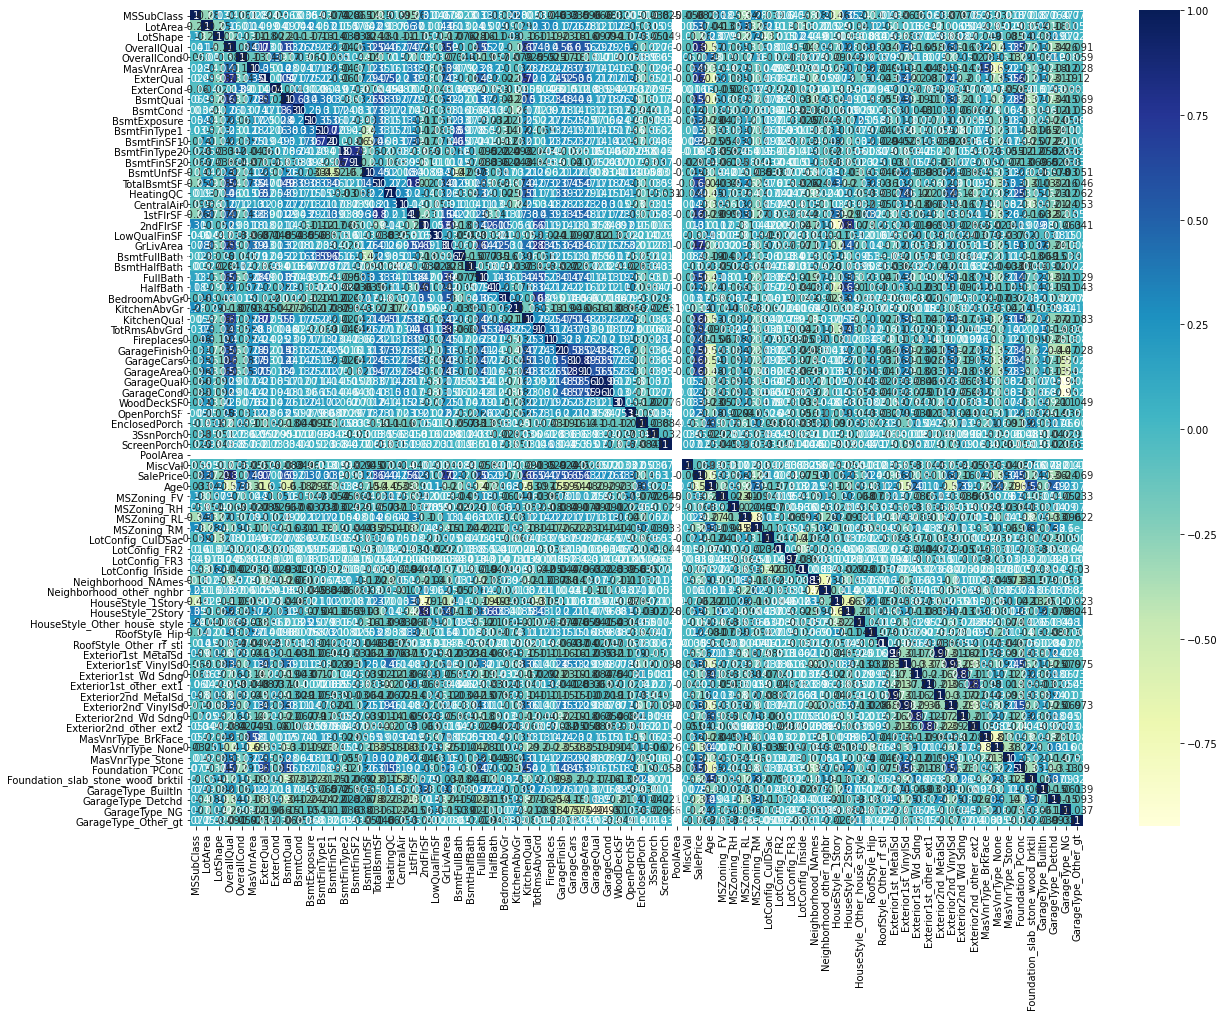

In [373]:
plt.figure(figsize=(20,15))
sns.heatmap(house_price.corr(),annot=True,cmap="YlGnBu")
plt.show()

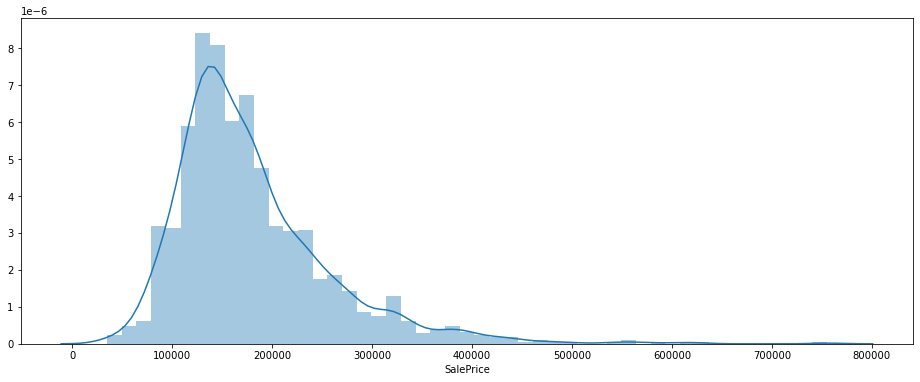

In [375]:
# checking if the Target variable is normally distributed

plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

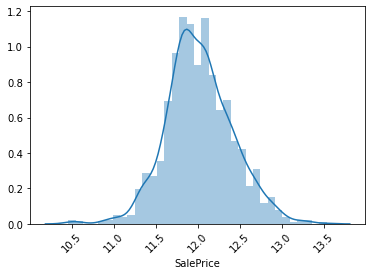

In [377]:
#log transformation on target variable
# After log transformation , it is looking normally distributed
house_price['SalePrice']=np.log1p(house_price.SalePrice)
x=house_price['SalePrice']
sns.distplot(x)
plt.xticks(rotation=45)
plt.show()

### MODELLING

In [374]:
house_price.head()

MSSubClass  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0          60     8450         3            7            5       196.0   
1          20     9600         3            6            8         0.0   
2          60    11250         0            7            5       162.0   
3          70     9550         0            7            5         0.0   
4          60    14260         0            8            5       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  ...  Exterior2nd_other_ext2  \
0          3          2         4         3  ...                       0   
1          2          2         4         3  ...                       0   
2          3          2         4         3  ...                       0   
3          2          2         3         4  ...                       1   
4          3          2         4         3  ...                       0   

   MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  Foundation_PConc  \
0                   1                0                 0                 1   
1                   0                1                 0                 0   
2                   1                0                 0                 1   
3                   0                1                 0                 0   
4                   1                0                 0                 1   

   Foundation_slab_stone_wood_brktil  GarageType_BuiltIn  GarageType_Detchd  \
0                                  0                   0                  0   
1                                  0                   0                  0   
2                                  0                   0                  0   
3                                  1                   0                  1   
4                                  0                   0                  0   

   GarageType_NG  GarageType_Other_gt  
0              0                    0  
1              0                    0  
2              0                    0  
3              0                    0  
4              0                    0  

[5 rows x 78 columns]

In [378]:
# Need to scale independent variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [379]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSSubClass                         1433 non-null   int64  
 1   LotArea                            1433 non-null   int64  
 2   LotShape                           1433 non-null   int64  
 3   OverallQual                        1433 non-null   int64  
 4   OverallCond                        1433 non-null   int64  
 5   MasVnrArea                         1433 non-null   float64
 6   ExterQual                          1433 non-null   int64  
 7   ExterCond                          1433 non-null   int64  
 8   BsmtQual                           1433 non-null   int64  
 9   BsmtCond                           1433 non-null   int64  
 10  BsmtExposure                       1433 non-null   int64  
 11  BsmtFinType1                       1433 non-null   int64

In [380]:
#checking float variables
house_float = house_price.select_dtypes(include=['float64'])
house_float.head()

MasVnrArea  SalePrice
0       196.0  12.247699
1         0.0  12.109016
2       162.0  12.317171
3         0.0  11.849405
4       350.0  12.429220

In [381]:
# Dividing X and Y
y=house_price.pop('SalePrice')
X=house_price


In [383]:
# Doing Train test split
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [384]:
X_train.shape

(1003, 77)

In [385]:
X_test.shape

(430, 77)

In [387]:
y_train.shape

(1003,)

In [388]:
y_test.shape

(430,)

In [389]:
X_train.head()

MSSubClass  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
594           20     7990         0            5            6         0.0   
125          190     6780         3            6            8         0.0   
1105          60    12256         0            8            5       362.0   
1314          20     8190         3            4            6         0.0   
147           60     9505         0            7            5       180.0   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  Exterior2nd_other_ext2  \
594           2          2         4         3  ...                       0   
125           2          1         3         3  ...                       0   
1105          3          2         5         3  ...                       0   
1314          2          2         3         3  ...                       0   
147           3          2         4         3  ...                       0   

      MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  Foundation_PConc  \
594                    0                1                 0                 0   
125                    0                1                 0                 0   
1105                   1                0                 0                 1   
1314                   0                1                 0                 0   
147                    1                0                 0                 1   

      Foundation_slab_stone_wood_brktil  GarageType_BuiltIn  \
594                                   0                   0   
125                                   0                   0   
1105                                  0                   0   
1314                                  0                   0   
147                                   0                   1   

      GarageType_Detchd  GarageType_NG  GarageType_Other_gt  
594                   1              0                    0  
125                   0              1                    0  
1105                  0              0                    0  
1314                  1              0                    0  
147                   0              0                    0  

[5 rows x 77 columns]

In [392]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal']

scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [393]:
# Model building using RFE to get the best sorted features and checking on the basis of it
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [394]:
# checking with one linear regression model
lm=LinearRegression()
lm.fit(X_train,y_train)

# selecting rfe as 25 variables
rfe=RFE(lm,25)
rfe=rfe.fit(X_train,y_train)

In [395]:
# getting rfe supported features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 18),
 ('LotArea', True, 1),
 ('LotShape', False, 40),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 33),
 ('ExterQual', True, 1),
 ('ExterCond', False, 14),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 5),
 ('BsmtExposure', False, 8),
 ('BsmtFinType1', False, 29),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 16),
 ('BsmtFinSF2', False, 15),
 ('BsmtUnfSF', False, 28),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 17),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 27),
 ('GrLivArea', False, 24),
 ('BsmtFullBath', False, 39),
 ('BsmtHalfBath', False, 52),
 ('FullBath', False, 21),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 23),
 ('KitchenAbvGr', False, 25),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 22),
 ('Fireplaces', False, 13),
 ('GarageFinish', True, 1),
 ('GarageCars', False, 12),
 ('GarageArea', True, 1),
 ('GarageQual', False, 6),
 ('GarageCond', Fals

In [396]:
#getting columns which have rfe supported columns
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'KitchenQual', 'GarageFinish', 'GarageArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac',
       'HouseStyle_1Story', 'HouseStyle_Other_house_style',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_PConc', 'GarageType_Other_gt'],
      dtype='object')

In [397]:
X_train_rfe=X_train[col]
X_train_rfe.head()
# we are further going to consider X_train_rfe set for future modelling(ridge and lasso)

LotArea  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtFinSF1  \
594  -0.371941    -0.807732     0.377187          2         4   -1.025512   
125  -0.602544    -0.055499     2.204816          2         3    0.133373   
1105  0.441077     1.448967    -0.536627          3         5    1.415242   
1314 -0.333825    -1.559965     0.377187          2         3    0.705720   
147  -0.083211     0.696734    -0.536627          3         4   -1.025512   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  ...  MSZoning_RL  \
594     -0.281851           1 -0.605097 -0.819617  ...            1   
125     -1.281156           0 -1.731918 -0.819617  ...            0   
1105     1.051380           1  1.001458  1.778144  ...            1   
1314    -0.222487           1 -0.538158 -0.819617  ...            1   
147     -0.380792           1 -0.716664  1.845288  ...            1   

      MSZoning_RM  LotConfig_CulDSac  HouseStyle_1Story  \
594             0                  0                  1   
125             1                  0                  0   
1105            0                  0                  0   
1314            0                  0                  1   
147             0                  1                  0   

      HouseStyle_Other_house_style  MasVnrType_BrkFace  MasVnrType_None  \
594                              0                   0                1   
125                              0                   0                1   
1105                             0                   1                0   
1314                             0                   0                1   
147                              0                   1                0   

      MasVnrType_Stone  Foundation_PConc  GarageType_Other_gt  
594                  0                 0                    0  
125                  0                 0                    0  
1105                 0                 1                    0  
1314                 0                 0                    0  
147                  0                 1                    0  

[5 rows x 25 columns]

#### RIDGE MODELLING

In [398]:
#importing necessary libraries needed now and furrher
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [399]:
# list of alphas to tune
params = {'alpha': [ 0.01, 0.05, 0.10,0.15, 
 0.2, 0.25,0.3,0.35, 0.4,0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                   0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [400]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008011      0.009649         0.001872        0.000264        0.01   
1       0.003665      0.000253         0.002077        0.000273        0.05   
2       0.004353      0.000288         0.002590        0.000197         0.1   
3       0.003989      0.000900         0.002136        0.000271        0.15   
4       0.003822      0.000875         0.002219        0.000501         0.2   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}          -0.087986          -0.086365          -0.090740   
1  {'alpha': 0.05}          -0.088070          -0.086320          -0.090697   
2   {'alpha': 0.1}          -0.088167          -0.086268          -0.090647   
3  {'alpha': 0.15}          -0.088256          -0.086220          -0.090601   
4   {'alpha': 0.2}          -0.088338          -0.086177          -0.090559   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087783  ...        -0.088708        0.001722               11   
1          -0.087620  ...        -0.088681        0.001744                9   
2          -0.087438  ...        -0.088650        0.001772                6   
3          -0.087274  ...        -0.088622        0.001801                4   
4          -0.087124  ...        -0.088598        0.001830                2   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086483           -0.086628           -0.086246   
1           -0.086453           -0.086618           -0.086238   
2           -0.086442           -0.086606           -0.086230   
3           -0.086448           -0.086595           -0.086222   
4           -0.086466           -0.086586           -0.086217   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.086383           -0.084863         -0.086121         0.000641  
1           -0.086391           -0.084878         -0.086116         0.000631  
2           -0.086400           -0.084897         -0.086115         0.000620  
3           -0.086408           -0.084916         -0.086118         0.000613  
4           -0.086415           -0.084933         -0.086123         0.000607  

[5 rows x 21 columns]

In [401]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


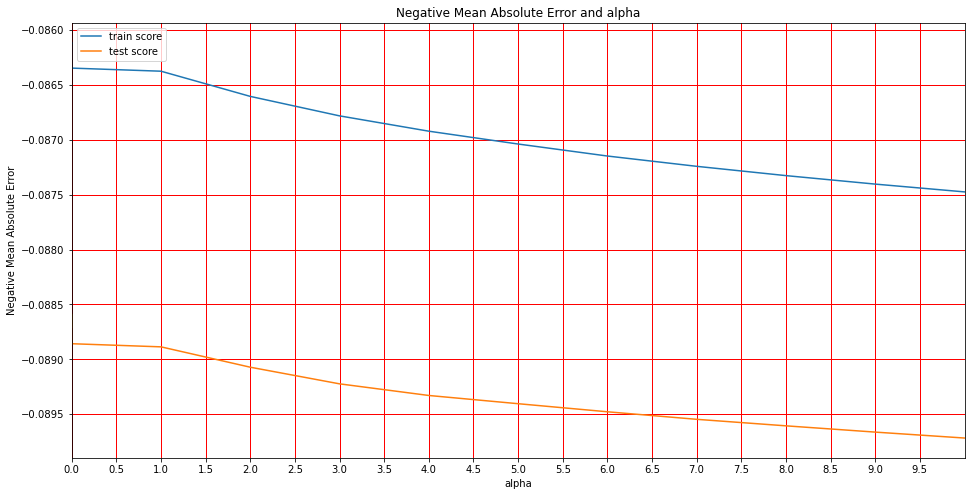

In [402]:
# plotting the train score and test score with negative mean absolute error values

plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 10)
plt.xticks(np.arange(0, 10, 0.5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [403]:
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.0294387 ,  0.09282307,  0.04467782,  0.03808676,  0.02517266,
        0.04037665,  0.0303675 ,  0.11205717,  0.10187392,  0.11789449,
        0.0341227 ,  0.03226661,  0.03912172,  0.3201009 ,  0.26135701,
        0.28461957,  0.17113312,  0.03114376,  0.02283499,  0.02809305,
        0.05674514,  0.04825241,  0.08459992,  0.07375268, -0.06167955])

In [404]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols =X_train_rfe.columns
cols=cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0           constant  11.225020
14       MSZoning_FV   0.320101
16       MSZoning_RL   0.284620
15       MSZoning_RH   0.261357
17       MSZoning_RM   0.171133
10          2ndFlrSF   0.117894
8         CentralAir   0.112057
9           1stFlrSF   0.101874
2        OverallQual   0.092823
23  MasVnrType_Stone   0.084600

In [ ]:
# Best features opted from Ridge are 
# MSZoning_FV ,MSZoning_RL,MSZoning_RH, MSZoning_RM, 2ndFlrSF, CentralAir,1stFlrSF,OverallQual,MasVnrType_Stone

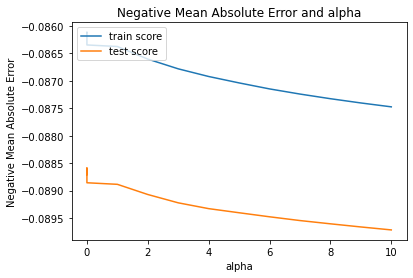

In [405]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting 
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [406]:
model_cv.best_params_


{'alpha': 0.25}

In [407]:
# building using best param of alpha as 0.25

alpha = 0.25
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.02945863,  0.09245867,  0.04474322,  0.03764954,  0.02527615,
        0.04034426,  0.03054434,  0.11134698,  0.1017914 ,  0.11827466,
        0.03397652,  0.0323145 ,  0.03936512,  0.36037057,  0.30427335,
        0.32302394,  0.20946426,  0.03135683,  0.02354439,  0.02868295,
        0.06336162,  0.05500722,  0.09170328,  0.07367922, -0.06001363])

In [408]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols =X_train_rfe.columns
cols=cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0           constant  11.181239
14       MSZoning_FV   0.360371
16       MSZoning_RL   0.323024
15       MSZoning_RH   0.304273
17       MSZoning_RM   0.209464
10          2ndFlrSF   0.118275
8         CentralAir   0.111347
9           1stFlrSF   0.101791
2        OverallQual   0.092459
23  MasVnrType_Stone   0.091703

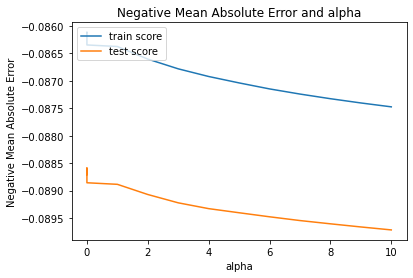

In [409]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [410]:
# making prediction on test 

y_pred_ridge_train = ridge.predict(X_train_rfe)
y_pred_ridge_test = ridge.predict(X_test[X_train_rfe.columns])

In [412]:
# checking R2 score
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))



r2_score in train dataset:
r2_score for ridge: 0.91
r2_score in test dataset:
r2_score for ridge: 0.86


#### R2 value for Train data set is 0.91 and for Test data set it is 0.86 , it is a good model built from our end

#### Lasso Regression Model

In [426]:
lasso = Lasso()

params={'alpha':[0.00005, 0.0001, 0.001, 0.008, 0.01]}


model=Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [427]:


cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009350      0.005112         0.002637        0.000514       5e-05   
1       0.009356      0.003782         0.002761        0.000388      0.0001   
2       0.005478      0.001418         0.003145        0.000714       0.001   
3       0.004491      0.000789         0.002429        0.000548       0.008   
4       0.003993      0.000460         0.002117        0.000505        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}          -0.088286          -0.086416          -0.090536   
1  {'alpha': 0.0001}          -0.088608          -0.086538          -0.090325   
2   {'alpha': 0.001}          -0.091246          -0.087421          -0.092015   
3   {'alpha': 0.008}          -0.098298          -0.089341          -0.101058   
4    {'alpha': 0.01}          -0.099436          -0.090741          -0.104021   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087430  ...        -0.088686        0.001709                2   
1          -0.087043  ...        -0.088679        0.001722                1   
2          -0.088592  ...        -0.090277        0.001914                3   
3          -0.094267  ...        -0.096001        0.003982                4   
4          -0.095692  ...        -0.097688        0.004385                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086451           -0.086575           -0.086248   
1           -0.086519           -0.086536           -0.086312   
2           -0.087800           -0.088191           -0.088522   
3           -0.093818           -0.093777           -0.094180   
4           -0.095631           -0.095878           -0.095815   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.086409           -0.084928         -0.086122         0.000606  
1           -0.086441           -0.085013         -0.086164         0.000581  
2           -0.088500           -0.086642         -0.087931         0.000696  
3           -0.093817           -0.092223         -0.093563         0.000686  
4           -0.095348           -0.093723         -0.095279         0.000799  

[5 rows x 21 columns]

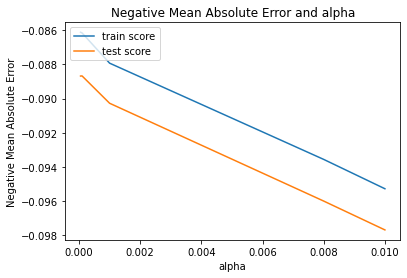

In [430]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting the train score and test score with negative mean absolute error values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [431]:
model_cv.best_params_

{'alpha': 0.0001}

In [441]:
# building model with alpha as 0.0001
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.0001)

In [443]:
cv_results1 = pd.DataFrame(model_cv.cv_results_)
cv_results1 = cv_results[cv_results1['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.009350      0.005112         0.002637        0.000514      0.00005   
1       0.009356      0.003782         0.002761        0.000388      0.00010   
2       0.005478      0.001418         0.003145        0.000714      0.00100   
3       0.004491      0.000789         0.002429        0.000548      0.00800   
4       0.003993      0.000460         0.002117        0.000505      0.01000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}          -0.088286          -0.086416          -0.090536   
1  {'alpha': 0.0001}          -0.088608          -0.086538          -0.090325   
2   {'alpha': 0.001}          -0.091246          -0.087421          -0.092015   
3   {'alpha': 0.008}          -0.098298          -0.089341          -0.101058   
4    {'alpha': 0.01}          -0.099436          -0.090741          -0.104021   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087430  ...        -0.088686        0.001709                2   
1          -0.087043  ...        -0.088679        0.001722                1   
2          -0.088592  ...        -0.090277        0.001914                3   
3          -0.094267  ...        -0.096001        0.003982                4   
4          -0.095692  ...        -0.097688        0.004385                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086451           -0.086575           -0.086248   
1           -0.086519           -0.086536           -0.086312   
2           -0.087800           -0.088191           -0.088522   
3           -0.093818           -0.093777           -0.094180   
4           -0.095631           -0.095878           -0.095815   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.086409           -0.084928         -0.086122         0.000606  
1           -0.086441           -0.085013         -0.086164         0.000581  
2           -0.088500           -0.086642         -0.087931         0.000696  
3           -0.093817           -0.092223         -0.093563         0.000686  
4           -0.095348           -0.093723         -0.095279         0.000799  

[5 rows x 21 columns]

In [445]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(11.495, 'constant'),
 (0.307, 'MSZoning_FV'),
 (0.278, 'MSZoning_RL'),
 (0.27, 'MSZoning_RH'),
 (0.198, 'MSZoning_RM'),
 (0.078, 'OverallQual'),
 (0.063, 'GrLivArea'),
 (-0.063, 'GarageType_Other_gt'),
 (0.056, 'OverallCond'),
 (0.05, 'MasVnrType_Stone'),
 (0.049, 'CentralAir'),
 (0.049, '1stFlrSF'),
 (0.049, '2ndFlrSF'),
 (0.047, 'Foundation_PConc'),
 (0.034, 'TotalBsmtSF'),
 (0.027, 'MasVnrType_None'),
 (0.026, 'HouseStyle_Other_house_style'),
 (-0.026, 'RoofStyle_Other_rf_stl'),
 (0.024, 'LotArea'),
 (-0.024, 'ExterCond'),
 (0.024, 'Foundation_slab_stone_wood_brktil'),
 (0.023, 'KitchenQual'),
 (0.023, 'LotConfig_CulDSac'),
 (0.023, 'Exterior1st_MetalSd'),
 (0.022, 'BsmtFinSF1'),
 (0.02, 'ExterQual'),
 (0.02, 'GarageArea'),
 (0.018, 'TotRmsAbvGrd'),
 (0.018, 'GarageQual'),
 (0.017, 'Exterior2nd_Wd Sdng'),
 (-0.016, 'MSSubClass'),
 (0.016, 'BsmtExposure'),
 (0.016, 'HalfBath'),
 (0.016, 'Fireplaces'),
 (-0.015, 'BsmtFinType2'),
 (0.015, 'MasVnrType_BrkFace'),
 (0.014, 'Exterior1st_

In [448]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)


Feature       Coef
0                       constant  11.495380
4                      ExterQual   0.077509
23              MasVnrType_Stone   0.063421
5                       BsmtQual   0.056206
20  HouseStyle_Other_house_style   0.049395
21            MasVnrType_BrkFace   0.048973
19             HouseStyle_1Story   0.048553
17                   MSZoning_RM   0.034245
2                    OverallQual   0.023923
13                    GarageArea   0.021531
7                    TotalBsmtSF   0.020099
11                   KitchenQual   0.016308
15                   MSZoning_RH   0.013069
24              Foundation_PConc   0.012048
9                       1stFlrSF   0.010979

In [ ]:
# Features selected by Lasso model are almost same like Ridge 
# OverallQual,1stFlrSF,2ndFlrSF,GarageArea,KitchenQual,GarageFinish,KitchenQual,GarageFinish,BsmtFinSF1,Foundation_PConc,TotalBsmtSF

In [423]:
# Making prediction on Test

y_pred_lasso_train = lasso.predict(X_train_rfe)
y_pred_lasso_test=lasso.predict(X_test[X_train_rfe.columns])

In [432]:
print('r2_score in train dataset:')
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for lasso: 0.88
r2_score in test dataset:
r2_score for lasso: 0.85


#### For the Lasso model The R2 value of train data is 0.88 and the test data is 0.85 , this is a good model so far

### CONCLUSION

- The model we have built using Ridge and lasso to predict the best features for House Pricing is as follows:
   OverallQual,1stFlrSF,2ndFlrSF,GarageArea,KitchenQual,GarageFinish,KitchenQual,GarageFinish,BsmtFinSF1,Foundation_PConc,TotalBsmtSF , MSZoning_FV ,MSZoning_RL,MSZoning_RH, MSZoning_RM, 2ndFlrSF, CentralAir, 1stFlrSF,OverallQual, MasVnrType_Stone
- The Train and Test R2 score for Ridge turned out to be 91% and 86%, which is a sign of a good model
- The Train and Test R2 score for Lasso turned out to be 88% and 85% , which is a very well score for a model
- We also considered the best optimal alpha value for ridge as 0.25 and for Lasso it is 0.0001





In [453]:

#I am also pasting the graph plotted for Lasso , where in the file I am not sure there is an error which triggered 
#and I wanted to showcase that I had got this graph , pasting it right away in the subjective question of mine. 
# Please do consider this. This happened at the last minute, not sure how i can again sit and redo the code,
# so kindly consider this.




# For subjective, modelling

# Ridge was built above already
# Doing for lasso




 


lasso = Lasso()

params={'alpha':[0.0002]}


model=Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.0002]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [454]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007529       0.00434          0.00236        0.000557      0.0002   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0002}          -0.089456          -0.086895          -0.089982   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087037  ...        -0.088906        0.001678                1   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086711           -0.086726           -0.086619   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.086626           -0.085233         -0.086383         0.000577  

[1 rows x 21 columns]

In [452]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)


Feature       Coef
0                       constant  11.495380
4                      ExterQual   0.077509
23              MasVnrType_Stone   0.063421
5                       BsmtQual   0.056206
20  HouseStyle_Other_house_style   0.049395
21            MasVnrType_BrkFace   0.048973
19             HouseStyle_1Story   0.048553
17                   MSZoning_RM   0.034245
2                    OverallQual   0.023923
13                    GarageArea   0.021531
7                    TotalBsmtSF   0.020099
11                   KitchenQual   0.016308
15                   MSZoning_RH   0.013069
24              Foundation_PConc   0.012048
9                       1stFlrSF   0.010979

In [455]:
# considering alpha as 0.0002 and rebuilding the lasso model
alpha =0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [456]:
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0002),
             param_grid={'alpha': [0.0002]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [457]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols =X_train_rfe.columns
cols=cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0           constant  11.326649
14       MSZoning_FV   0.269694
16       MSZoning_RL   0.236320
15       MSZoning_RH   0.205394
17       MSZoning_RM   0.121594
10          2ndFlrSF   0.114131
8         CentralAir   0.110099
9           1stFlrSF   0.102247
2        OverallQual   0.094096
24  Foundation_PConc   0.073513

In [458]:
y_pred_lasso_train = lasso.predict(X_train_rfe)
y_pred_lasso_test=lasso.predict(X_test[X_train_rfe.columns])

In [459]:

print('r2_score in train dataset:')
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for lasso: 0.91
r2_score in test dataset:
r2_score for lasso: 0.86


In [460]:


#Rechecking for alpha as 0.0001 for Lasso which i already have done

alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)


Lasso(alpha=0.0001)

In [461]:
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0002]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [462]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006604      0.000757         0.002497        0.000165      0.0002   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0002}          -0.089456          -0.086895          -0.089982   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087037  ...        -0.088906        0.001678                1   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.086711           -0.086726           -0.086619   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.086626           -0.085233         -0.086383         0.000577  

[1 rows x 21 columns]

In [463]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols =X_train_rfe.columns
cols=cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0           constant  11.238458
14       MSZoning_FV   0.341658
16       MSZoning_RL   0.305054
15       MSZoning_RH   0.283602
17       MSZoning_RM   0.191032
10          2ndFlrSF   0.116351
8         CentralAir   0.109955
9           1stFlrSF   0.101886
2        OverallQual   0.093066
24  Foundation_PConc   0.073660

In [464]:
y_pred_lasso_train = lasso.predict(X_train_rfe)
y_pred_lasso_test=lasso.predict(X_test[X_train_rfe.columns])

In [465]:
print('r2_score in train dataset:')
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for lasso: 0.91
r2_score in test dataset:
r2_score for lasso: 0.86
